<a href="https://colab.research.google.com/github/Pupuyan/bg_peter_test/blob/main/BG_matting_Peter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown -q

In [2]:
!gdown https://drive.google.com/uc?id=1-t9SO--H4WmP7wUl1tVNNeDkq47hjbv4 -O model.pth -q
!gdown https://drive.google.com/uc?id=1g_n7kzDppAA2BNwUfit0eVKXLHRVBOw- -O src.png -q
!gdown https://drive.google.com/uc?id=1ywAx_GKGswFQjt3rWBLjdLtzjrjiOWpG -O bgr.png -q

In [37]:
import torch
from torchvision.transforms.functional import to_tensor, to_pil_image
from PIL import Image
from matplotlib import pyplot as plt
import cv2 
import os

In [30]:
def peter_bg_matting(bgr_name, src_name, test_folder = "/content/drive/MyDrive/bgr_and_src/"):
    model = torch.jit.load('model.pth').cuda().eval()

    src_location = test_folder + src_name
    bgr_location = test_folder + bgr_name

    src = Image.open(src_location)
    bgr = Image.open(bgr_location)
    
    plt.subplot(1,2,1)
    plt.imshow(bgr) 
    plt.title('background')
    plt.axis('off')
 
    plt.subplot(1,2,2)
    plt.imshow(src) 
    plt.title('resource')
    plt.axis('off') 

    plt.show()

    src = to_tensor(src).cuda().unsqueeze(0)
    bgr = to_tensor(bgr).cuda().unsqueeze(0)

    if src.size(2) <= 2048 and src.size(3) <= 2048:
        model.backbone_scale = 1/4
        model.refine_sample_pixels = 80_000
    else:
        model.backbone_scale = 1/8
        model.refine_sample_pixels = 320_000
    
    pha, fgr = model(src, bgr)[:2]
    com = pha * fgr + (1 - pha) * torch.tensor([120/255, 255/255, 155/255], device='cuda').view(1, 3, 1, 1)
    
    return to_pil_image(com[0].cpu())

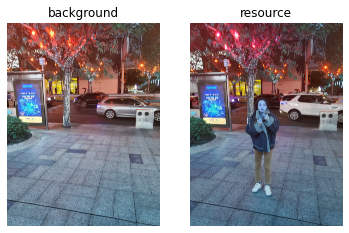

In [38]:
bgr_name = 'human_bgr.jpg'
src_name = 'human_src2.jpg'
rootpath = "/content/drive/MyDrive/bgr_and_src/"

bgr = cv2.imread(os.path.join(rootpath, bgr_name))
src = cv2.imread(os.path.join(rootpath, src_name))

plt.subplot(1,2,1)
plt.imshow(bgr) 
plt.title('background')
plt.axis('off')
 
plt.subplot(1,2,2)
plt.imshow(src) 
plt.title('resource')
plt.axis('off') 

plt.show() # the kernel is asymmetric, so the outputs are different


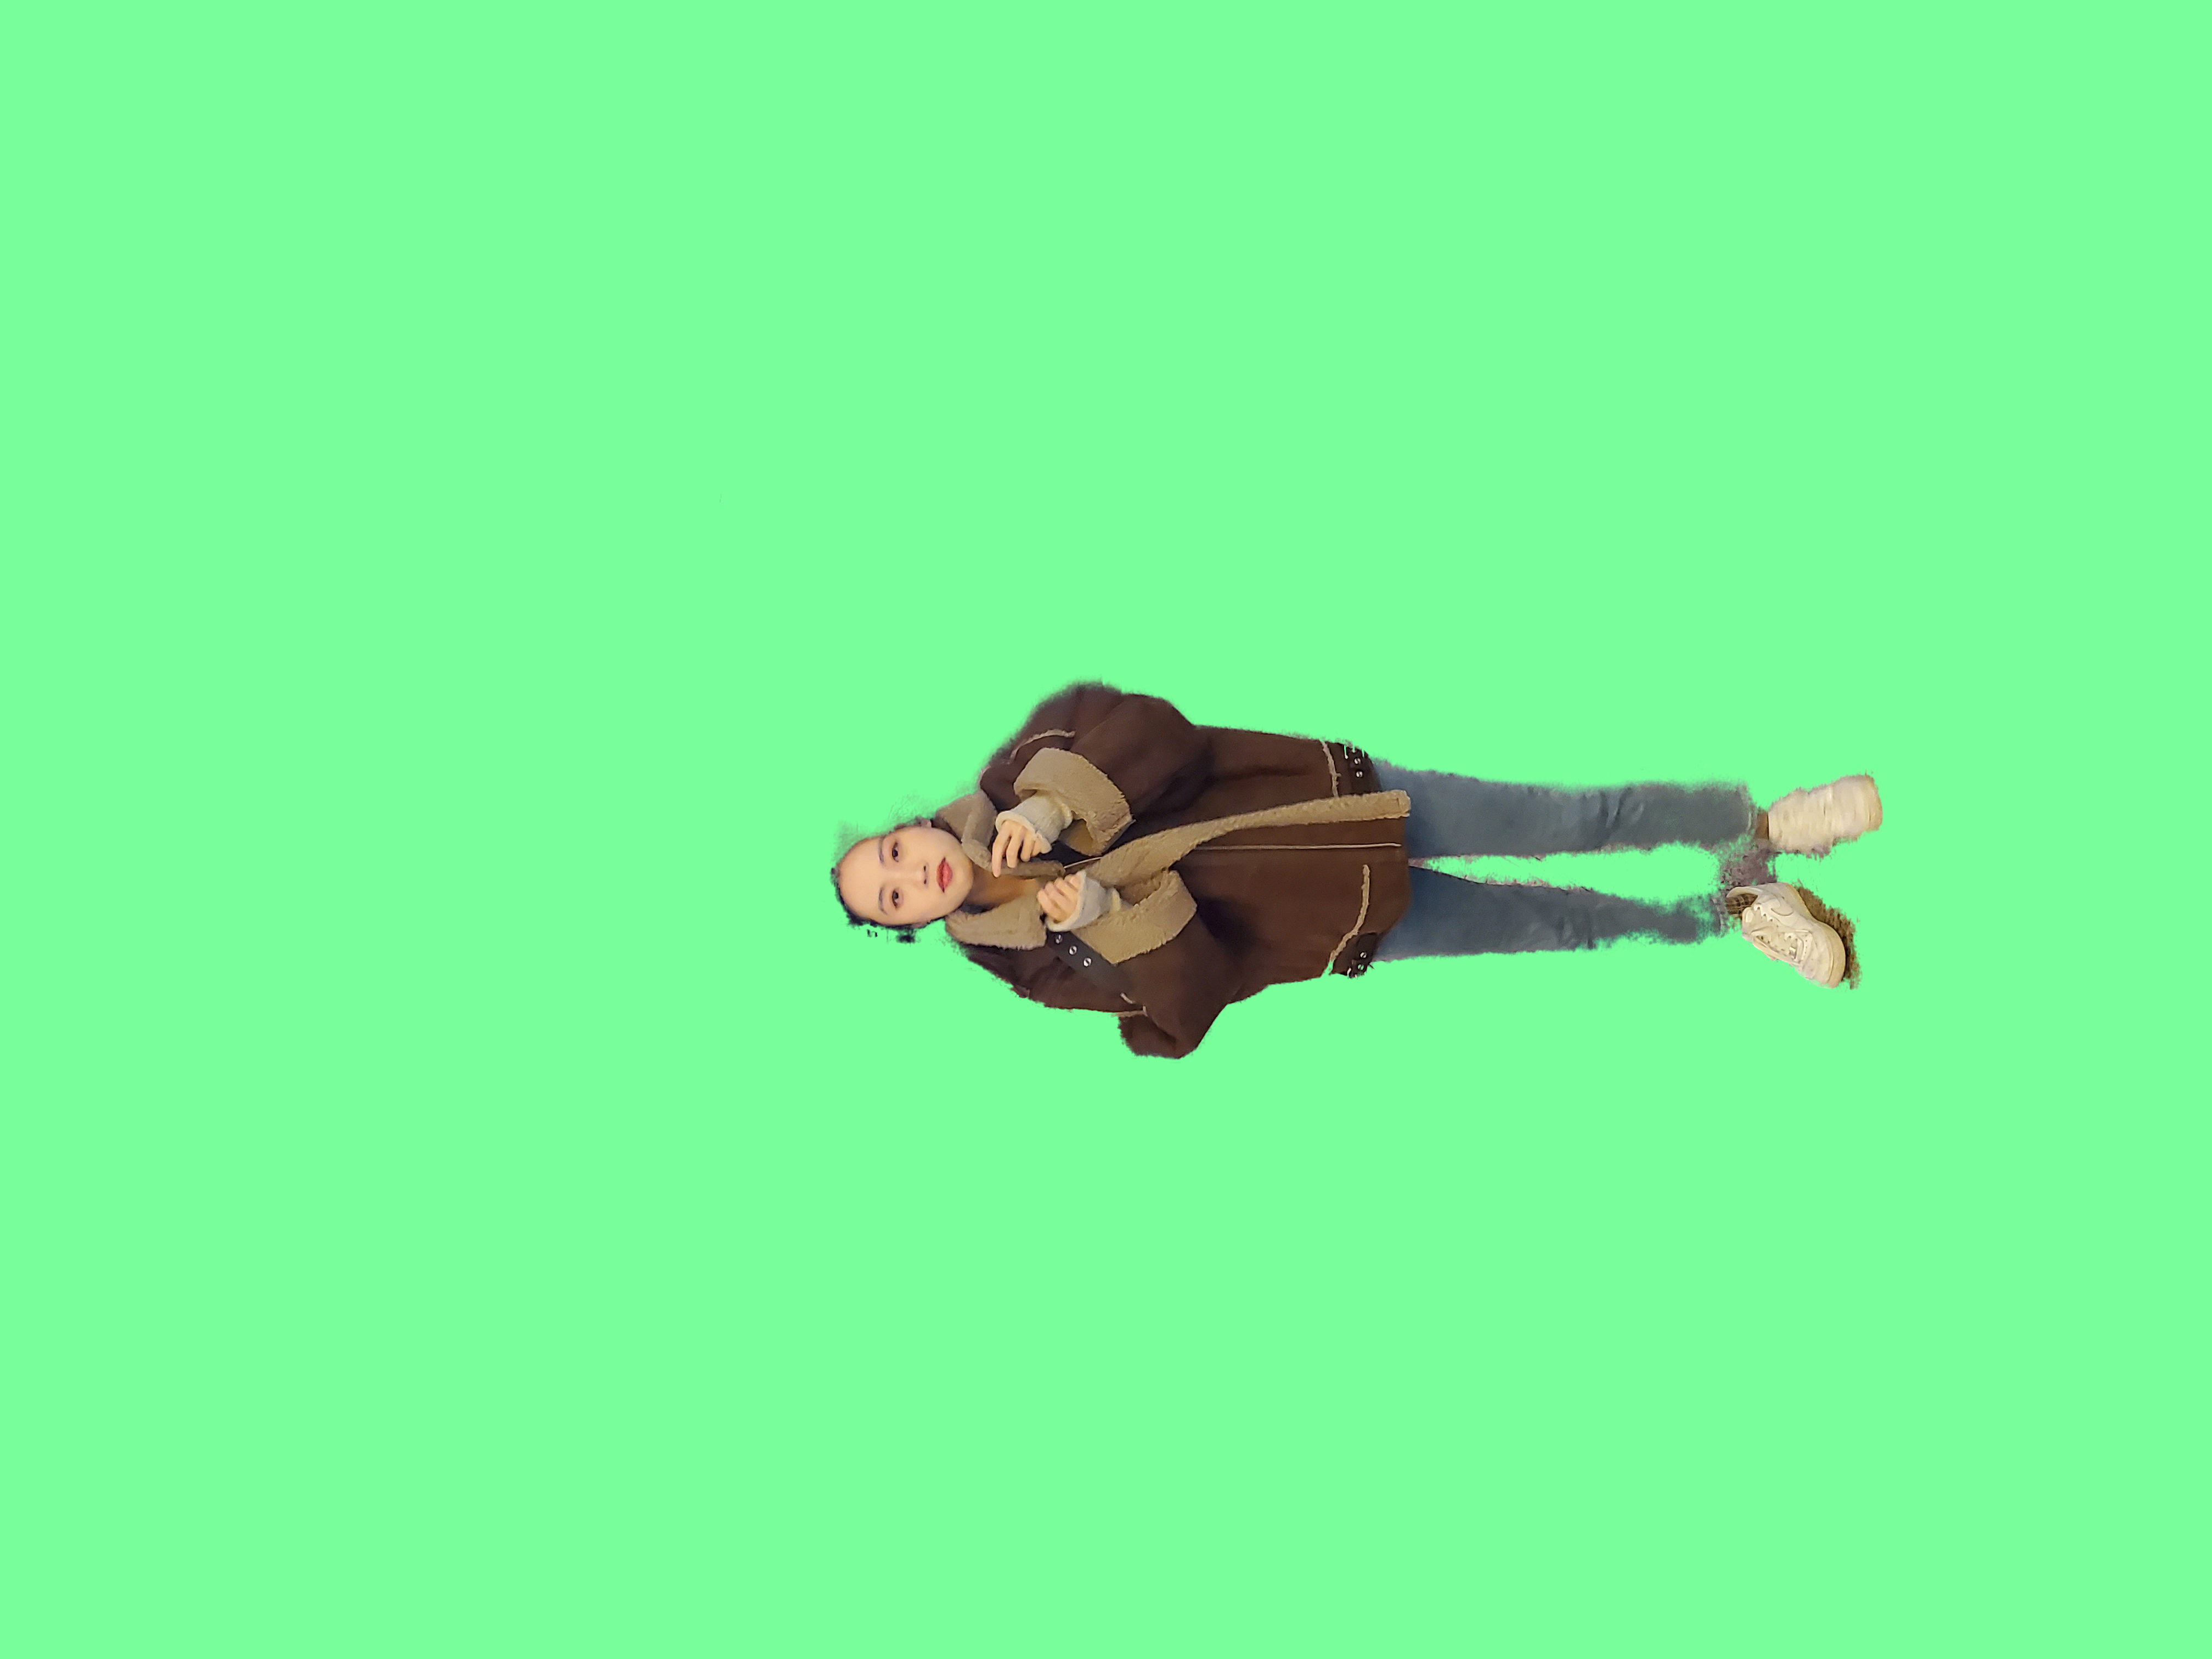

In [24]:
peter_bg_matting(bgr,src)